# Master M2 MVA 2018/2019 - Graphical models - HWK 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.LDA import LDA
from utils.LogisticRegression import LogisticRegression
from utils.LinearRegression import LinearRegression
from utils.QDA import QDA
import numpy as np

#### Load datasets sets

In [2]:
train_A = pd.read_table("data/classificationA.train", header=None)
train_B = pd.read_table("data/classificationB.train", header=None)
train_C = pd.read_table("data/classificationC.train", header=None)
test_A = pd.read_table("data/classificationA.test", header=None)
test_B = pd.read_table("data/classificationB.test", header=None)
test_C = pd.read_table("data/classificationC.test", header=None)

print "Shape train A : ", train_A.shape
print "Shape train B : ", train_B.shape
print "Shape train C : ", train_C.shape

print "Shape test A : ", test_A.shape
print "Shape test B : ", test_B.shape
print "Shape test C : ", test_C.shape

print "A - 1: " + str(len(train_A.loc[train_A[2]==1])) + " - 0: " + str(len(train_A.loc[train_A[2]==0]))
print "B - 1: " + str(len(train_B.loc[train_B[2]==1])) + " - 0: " + str(len(train_B.loc[train_B[2]==0]))
print "C - 1: " + str(len(train_C.loc[train_C[2]==1])) + " - 0: " + str(len(train_C.loc[train_C[2]==0]))

train_A = train_A.values
train_B = train_B.values
train_C = train_C.values
test_A = test_A.values
test_B = test_B.values
test_C = test_C.values

Shape train A :  (150, 3)
Shape train B :  (300, 3)
Shape train C :  (400, 3)
Shape test A :  (1500, 3)
Shape test B :  (2000, 3)
Shape test C :  (3000, 3)
A - 1: 50 - 0: 100
B - 1: 150 - 0: 150
C - 1: 250 - 0: 150


In [20]:
train = {'A': train_A, 'B': train_B, 'C': train_C}
test = {'A': test_A, 'B': test_B, 'C': test_C}
missclassification = {'train':{}, 'test':{}}

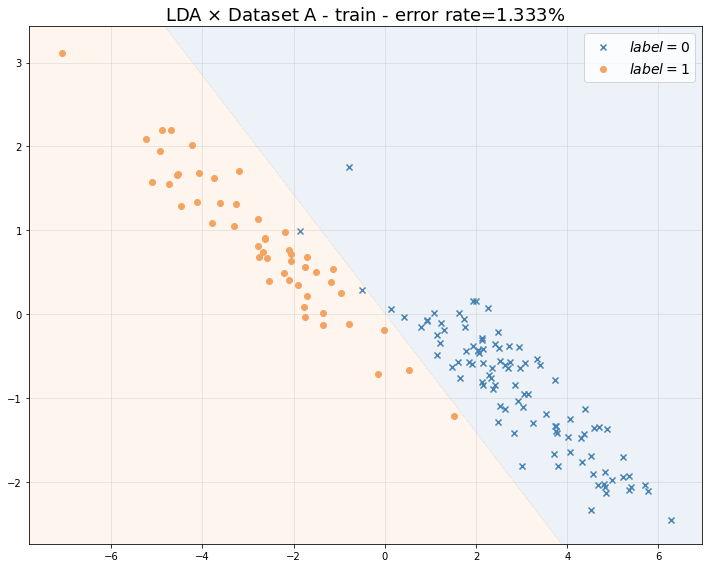

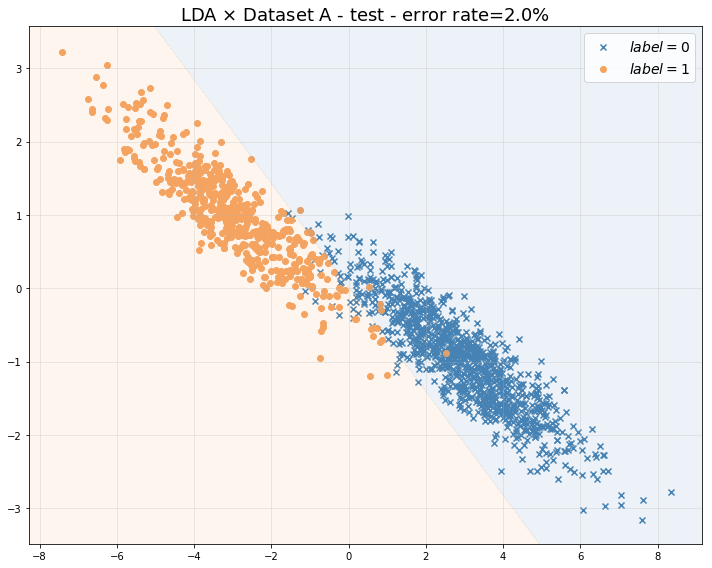

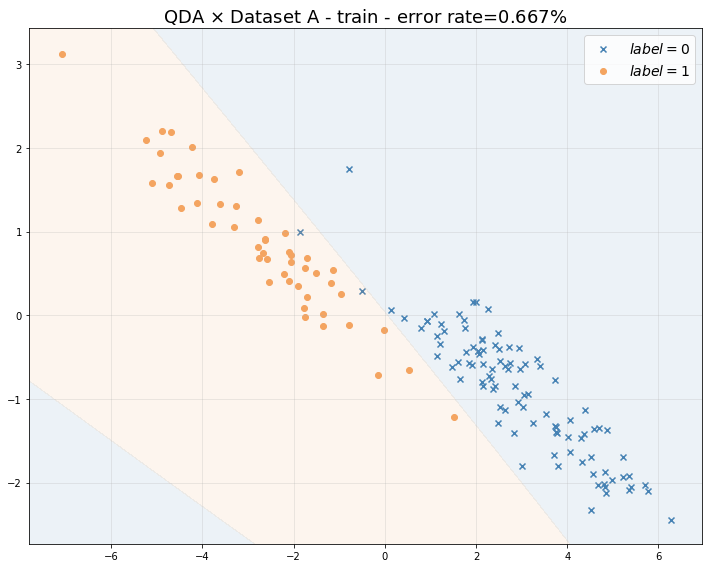

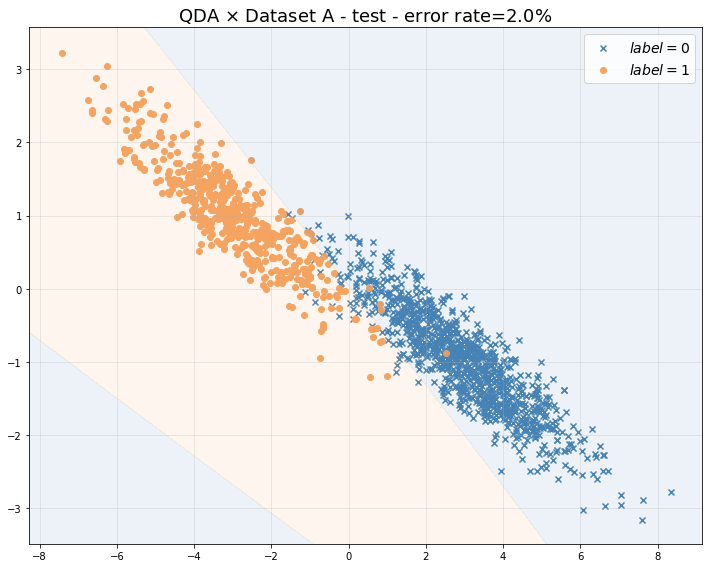

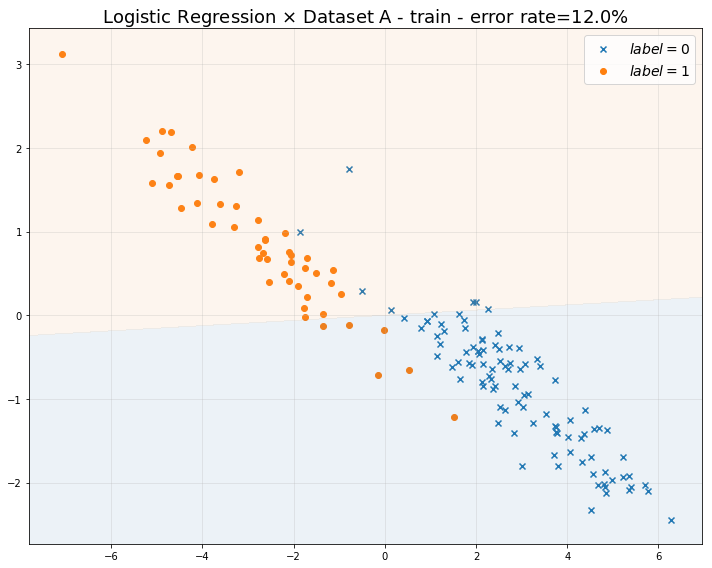

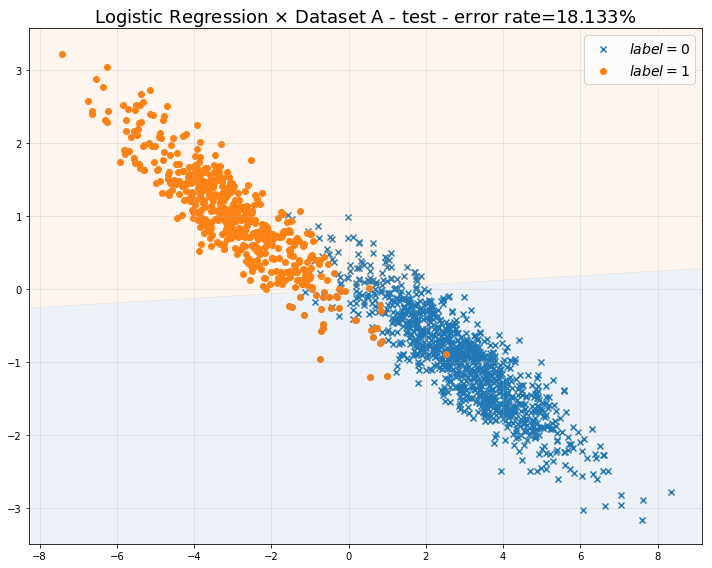

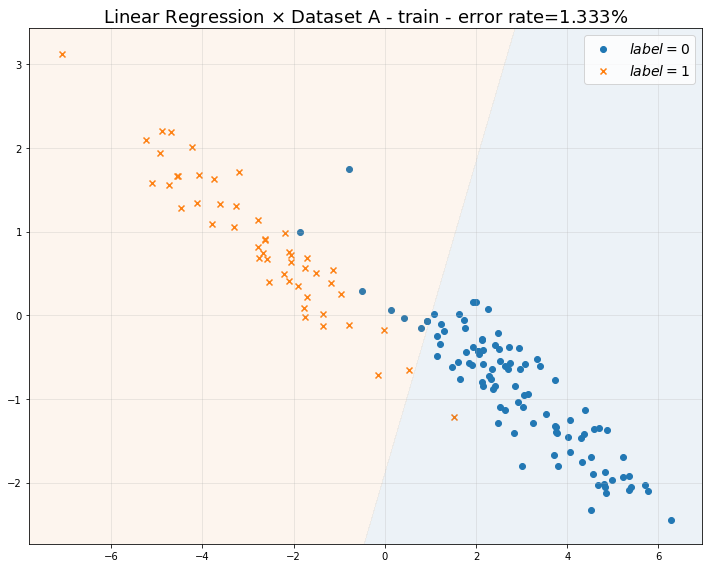

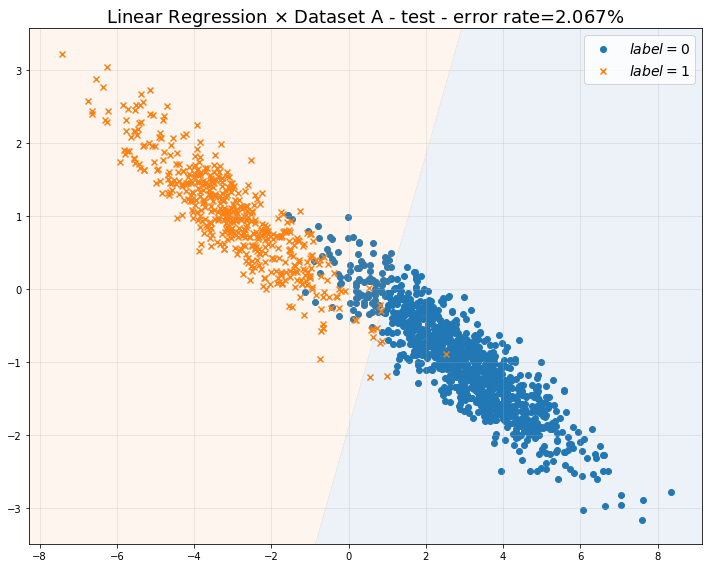

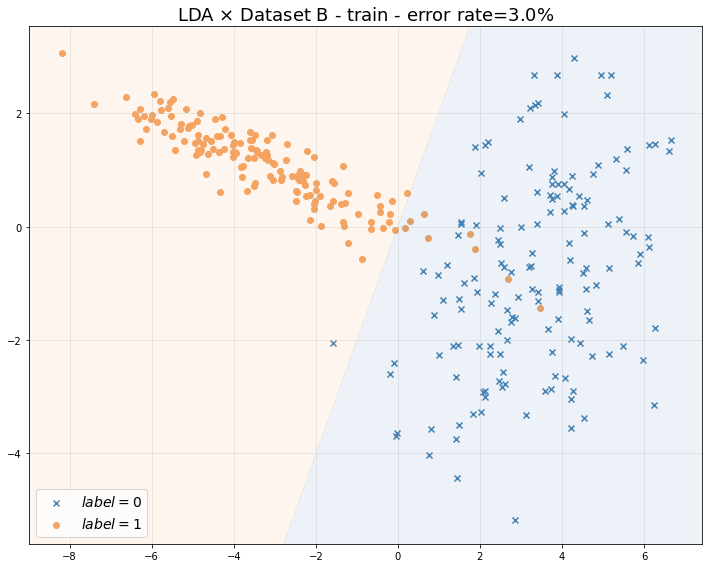

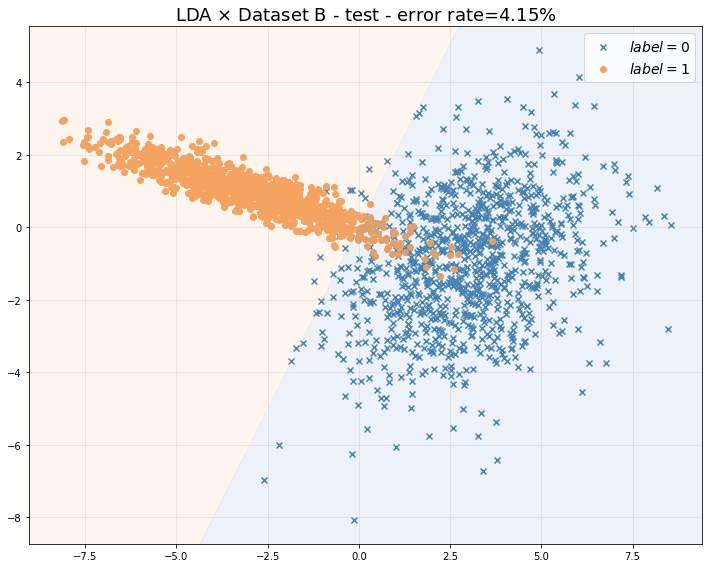

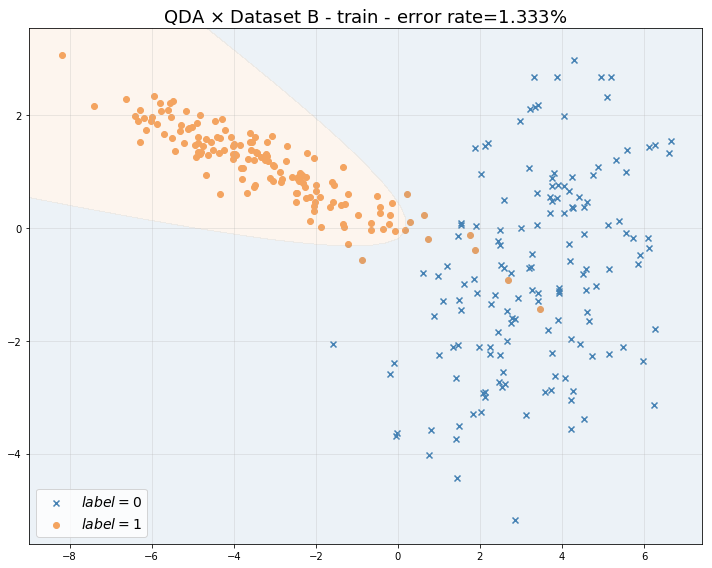

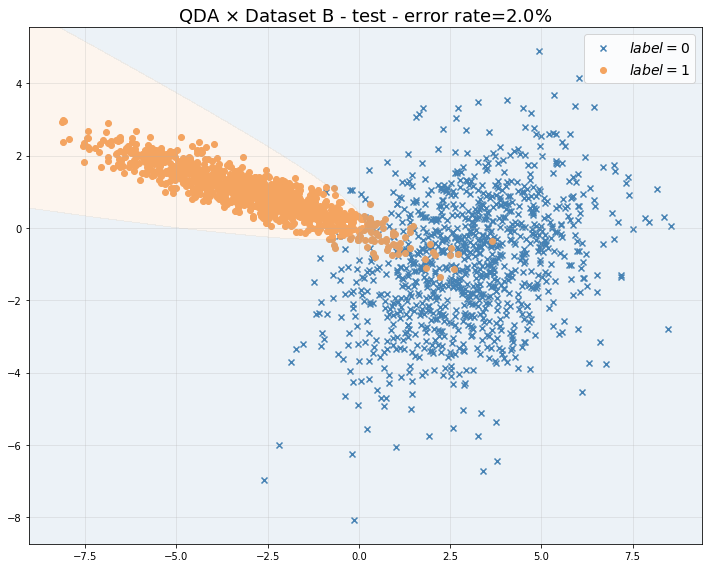

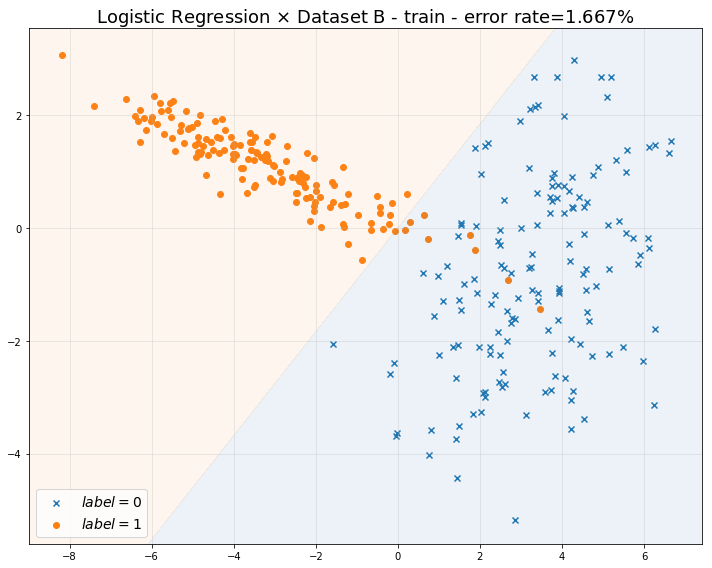

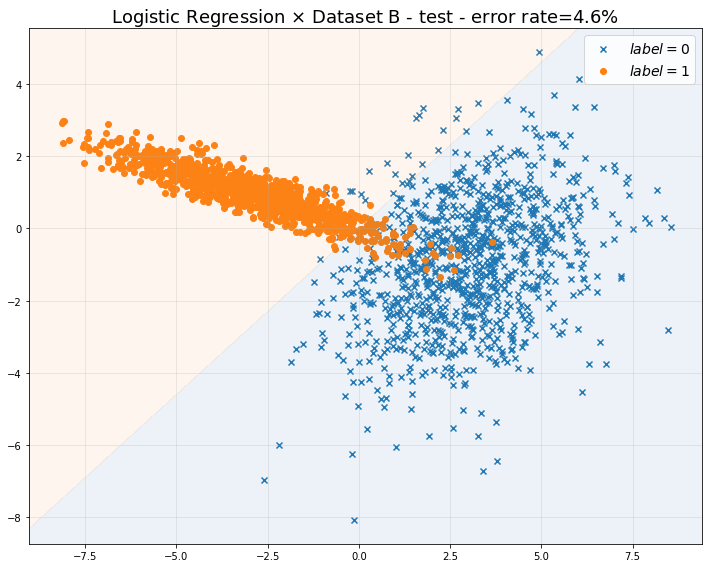

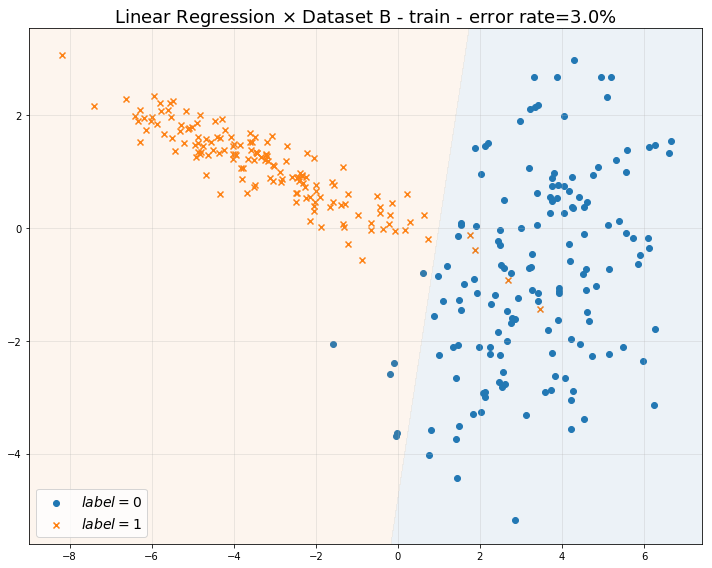

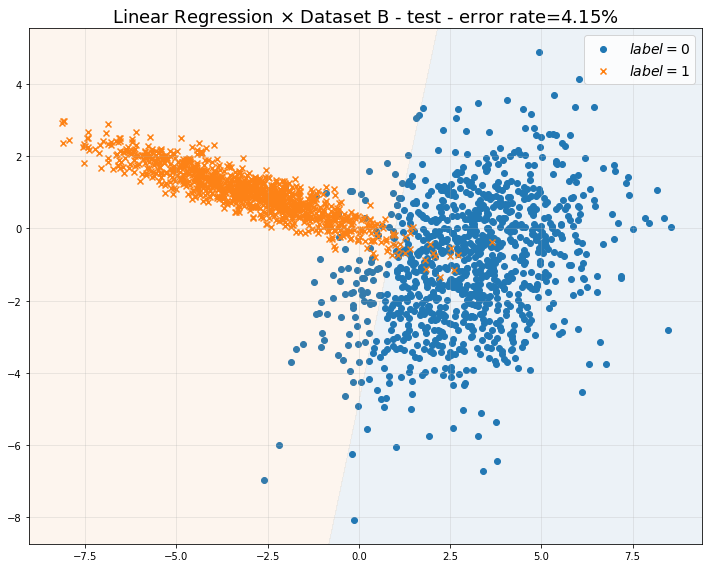

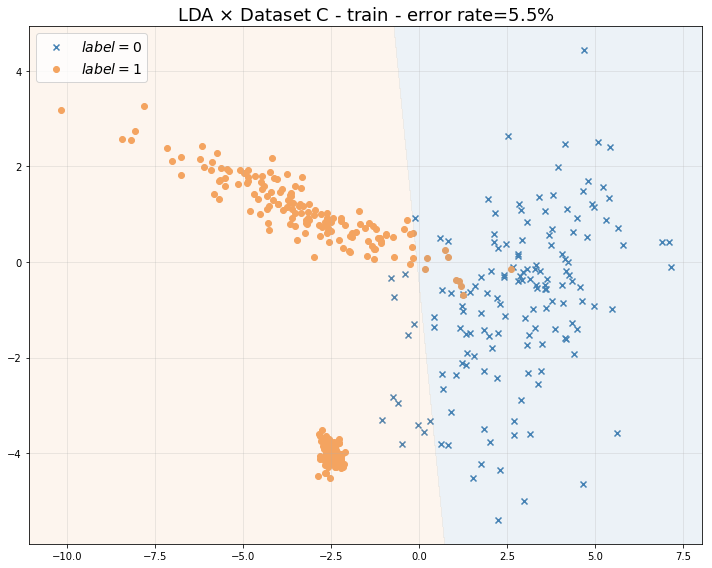

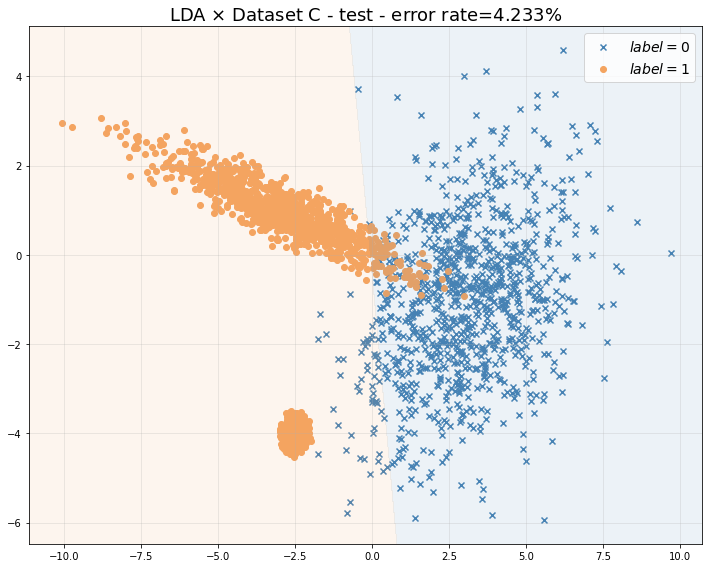

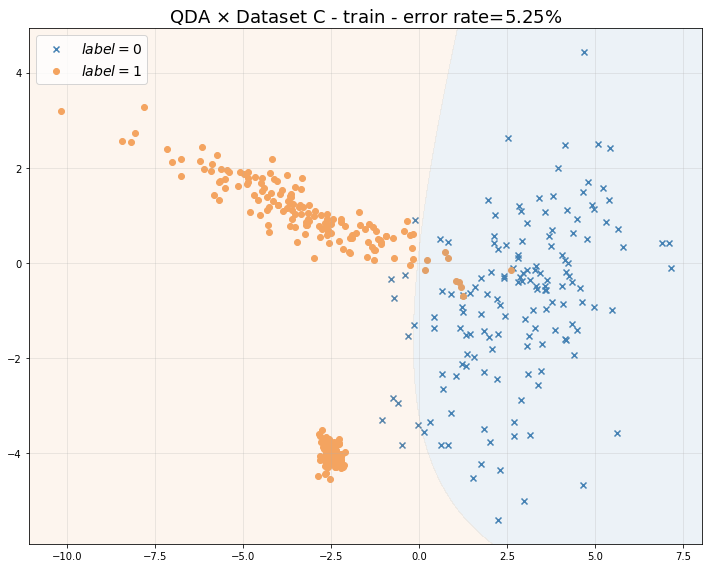

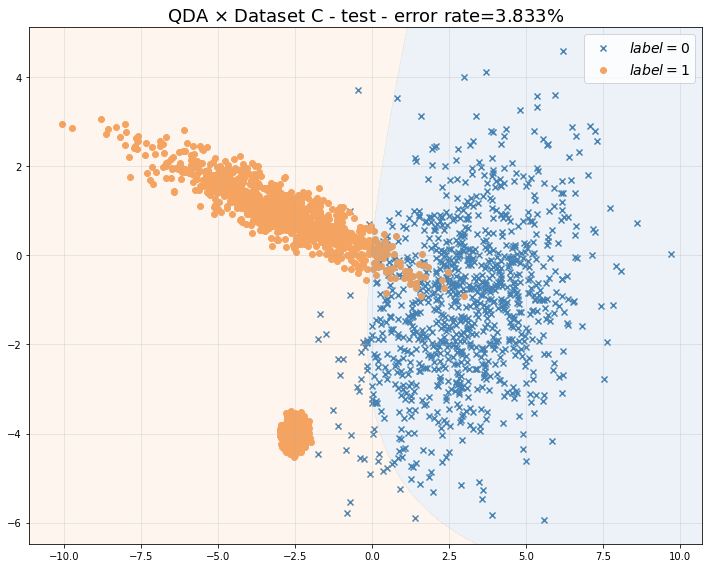

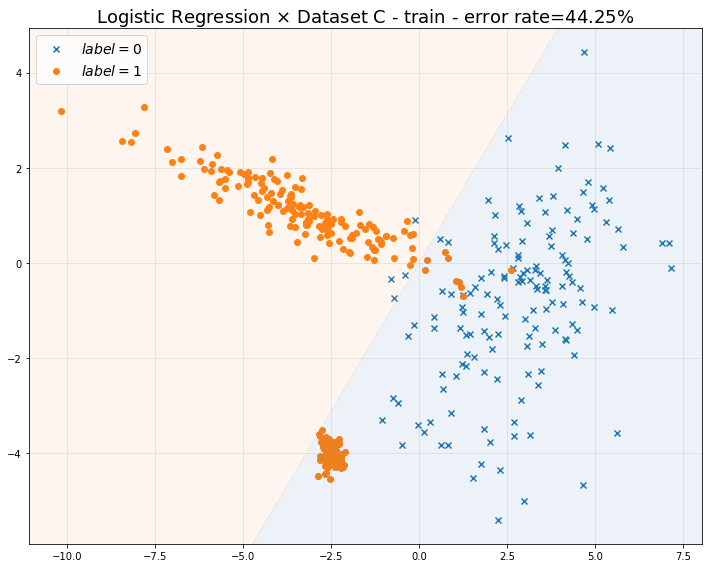

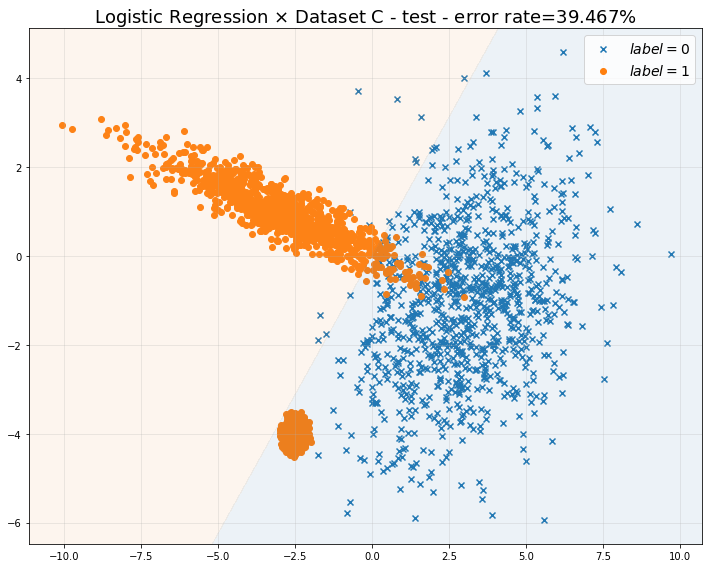

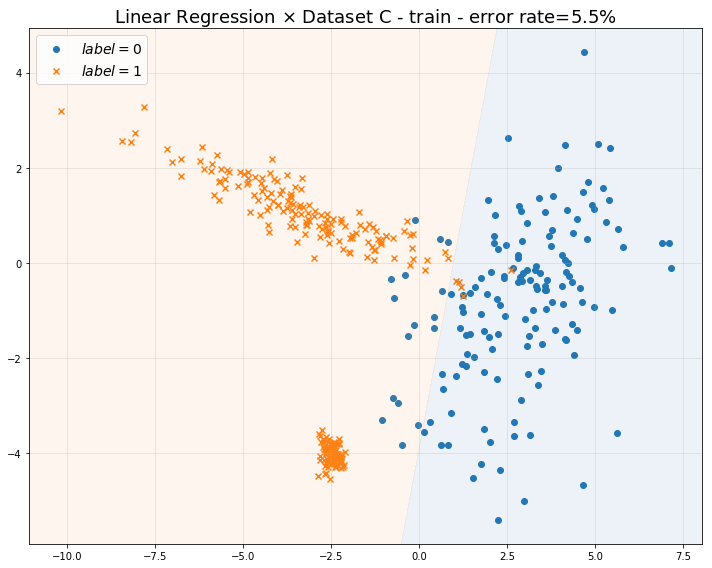

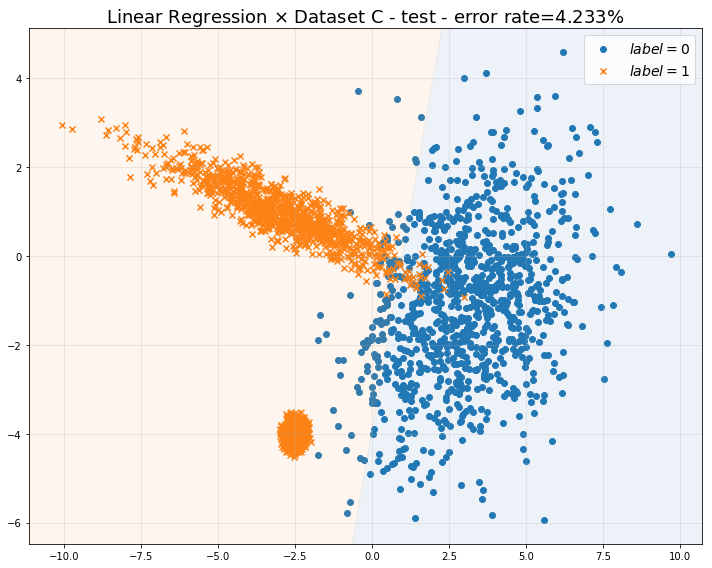

In [23]:
for key in ['A', 'B', 'C']:
    X_train = train[key][:,:2]
    y_train = train[key][:,-1]
    X_test = test[key][:,:2]
    y_test = test[key][:,-1]
    lda = LDA()
    logreg = LogisticRegression()
    linreg = LinearRegression()
    qda = QDA()
    clf = {'LDA': lda, 
           'Logistic Regression': logreg,
           'Linear Regression': linreg,
           'QDA': qda}
    missclassification['train'][key] = {}
    missclassification['test'][key] = {}
    
    for clf_key in clf.keys():
        np.random.seed(1)
        clf[clf_key].fit(X_train, y_train)
        
        error = clf[clf_key].missclassification(X_train, y_train)
        missclassification['train'][key][clf_key] = error
        title = clf_key + r" $\times$ Dataset " + key + " - train - error rate="+str(round(100*error,3)) + "%"
        clf[clf_key].plot_pred(X_train, y_train, title=title)
        save_path = "_".join(["docs/img/"+clf_key, key, "train.png"])
        plt.savefig(save_path)
        
        error = clf[clf_key].missclassification(X_test, y_test)
        missclassification['test'][key][clf_key] = error
        title = clf_key + r" $\times$ Dataset " + key + " - test - error rate="+str(round(100*error,3)) + "%"
        clf[clf_key].plot_pred(X_test, y_test, title=title)
        save_path = "_".join(["docs/img/"+clf_key, key, "test.png"]) 
        plt.savefig(save_path)

In [24]:
missclassification

{'test': {'A': {'LDA': 0.02,
   'Linear Regression': 0.020666666666666667,
   'Logistic Regression': 0.18133333333333335,
   'QDA': 0.02},
  'B': {'LDA': 0.0415,
   'Linear Regression': 0.0415,
   'Logistic Regression': 0.046,
   'QDA': 0.02},
  'C': {'LDA': 0.042333333333333334,
   'Linear Regression': 0.042333333333333334,
   'Logistic Regression': 0.39466666666666667,
   'QDA': 0.03833333333333333}},
 'train': {'A': {'LDA': 0.013333333333333334,
   'Linear Regression': 0.013333333333333334,
   'Logistic Regression': 0.12,
   'QDA': 0.006666666666666667},
  'B': {'LDA': 0.03,
   'Linear Regression': 0.03,
   'Logistic Regression': 0.016666666666666666,
   'QDA': 0.013333333333333334},
  'C': {'LDA': 0.055,
   'Linear Regression': 0.055,
   'Logistic Regression': 0.4425,
   'QDA': 0.0525}}}

## 1. Generative model (LDA)

$$y ∼ \mathcal{B}(\pi),\enspace x|\{y = i\} ∼ \mathcal{N}(\mu_{i}, \Sigma). $$

$$\hat{\pi} = \frac{1}{N}\sum_{i=1}^{n}y_{i}$$

$$\forall j\in\{0,1\}, \enspace\hat{\mu}_{j}=\frac{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}x_{i}}{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}}$$

$$\hat{\Sigma}=\frac{1}{n}\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=0\}}(x_{i}-\hat{\mu}_{0})(x_{i}-\hat{\mu}_{0})^{T}+\mathbb{1}_{\{y_{i}=1\}}(x_{i}-\hat{\mu}_{1})(x_{i}-\hat{\mu}_{1})^{T}$$

$$p(y=1|x)=\frac{1}{2} \Leftrightarrow \left(\Sigma^{-1}(\mu_{1}-\mu_{0})\right)^{T}x + \frac{1}{2}\mu_{1}^{T}\Sigma^{-1}\mu_{1}-\frac{1}{2}\mu_{0}^{T}\Sigma^{-1}\mu_{0} = \log\left(\frac{\pi}{1-\pi}\right)$$

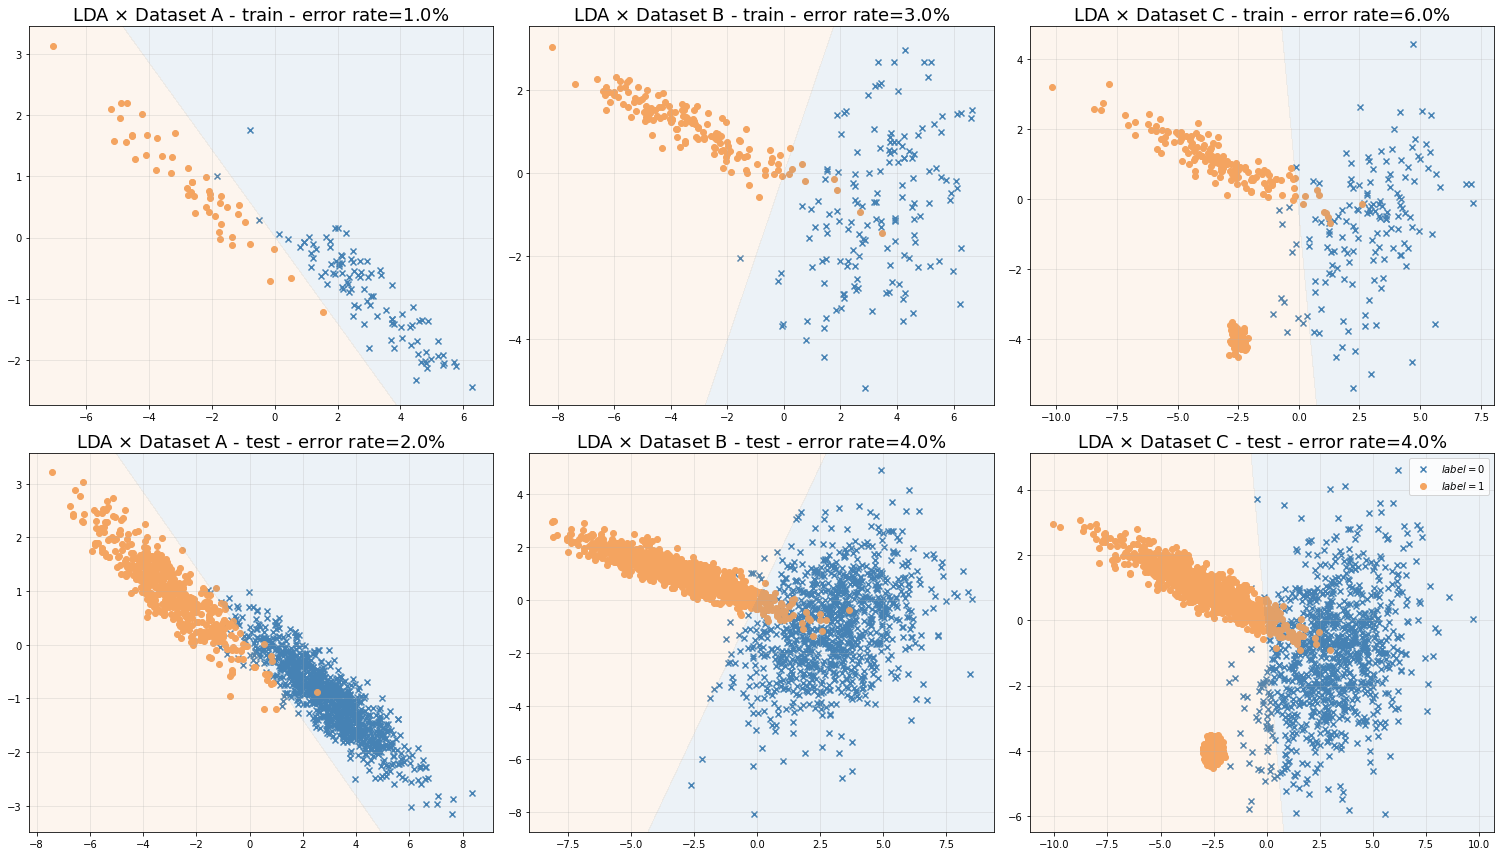

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(21, 12))

for idx, key in enumerate(['A', 'B', 'C']):
    X_train = train[key][:,:2]
    y_train = train[key][:,-1]
    X_test = test[key][:,:2]
    y_test = test[key][:,-1]
    
    lda = LDA()
    lda.fit(X_train, y_train)
    
    missclassification = lda.missclassification(X_train, y_train)
    title = r"LDA $\times$ Dataset " + key + " - train - error rate="+str(round(100*missclassification)) + "%"
    ax[0][idx] = lda.plot_pred(X_train, y_train, title=title, figsize=(6, 6), ax=ax[0][idx])
    
    missclassification = lda.missclassification(X_test, y_test)
    title = r"LDA $\times$ Dataset " + key + " - test - error rate="+str(round(100*missclassification)) + "%"
    ax[1][idx] = lda.plot_pred(X_test, y_test, title=title, figsize=(6, 6), ax=ax[1][idx])
    plt.legend()

## 2. Logistic regression

$$ Y\,|\,X \sim \mathcal{B}\left(\sigma(w^{T}X+b)\right)$$

$$p(y=1|x)=\frac{1}{2}\Leftrightarrow x\perp w$$

$$\mathcal{L}(\beta, w) = \ell(w) + \frac{\beta}{2}\|w\|^{2}$$

$$\nabla\mathcal{L}(\beta, w) = \nabla\ell(w) + \beta w$$

$$H\mathcal{L}(\beta, w) = H\ell(w) + \beta I$$

In [18]:
np.random.seed(1)
X = train['A'][:,:2]
y = train['A'][:,-1]
logreg = LogisticRegression()
logreg.fit(X, y)
logreg.missclassification(X, y)

y_pred = logreg.predict(X)
np.where(y_pred!=y)

(array([  1,  17,  21,  36,  37,  39,  43,  58,  87,  91,  92,  97, 102,
        115, 122, 129, 140, 145]),)

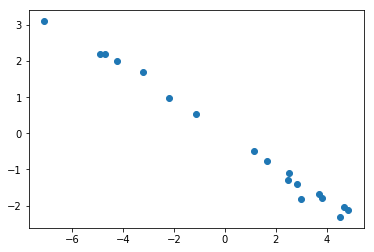

In [24]:
plt.scatter(*X[np.where(y_pred!=y)[0]].T)

utils/LogisticRegression.py:10: RuntimeWarning: divide by zero encountered in log
  l_w = np.sum(y*np.log(eta)) + np.sum((1-y)*np.log(1-eta))
utils/LogisticRegression.py:10: RuntimeWarning: invalid value encountered in multiply
  l_w = np.sum(y*np.log(eta)) + np.sum((1-y)*np.log(1-eta))
No handlers could be found for logger "matplotlib.legend"


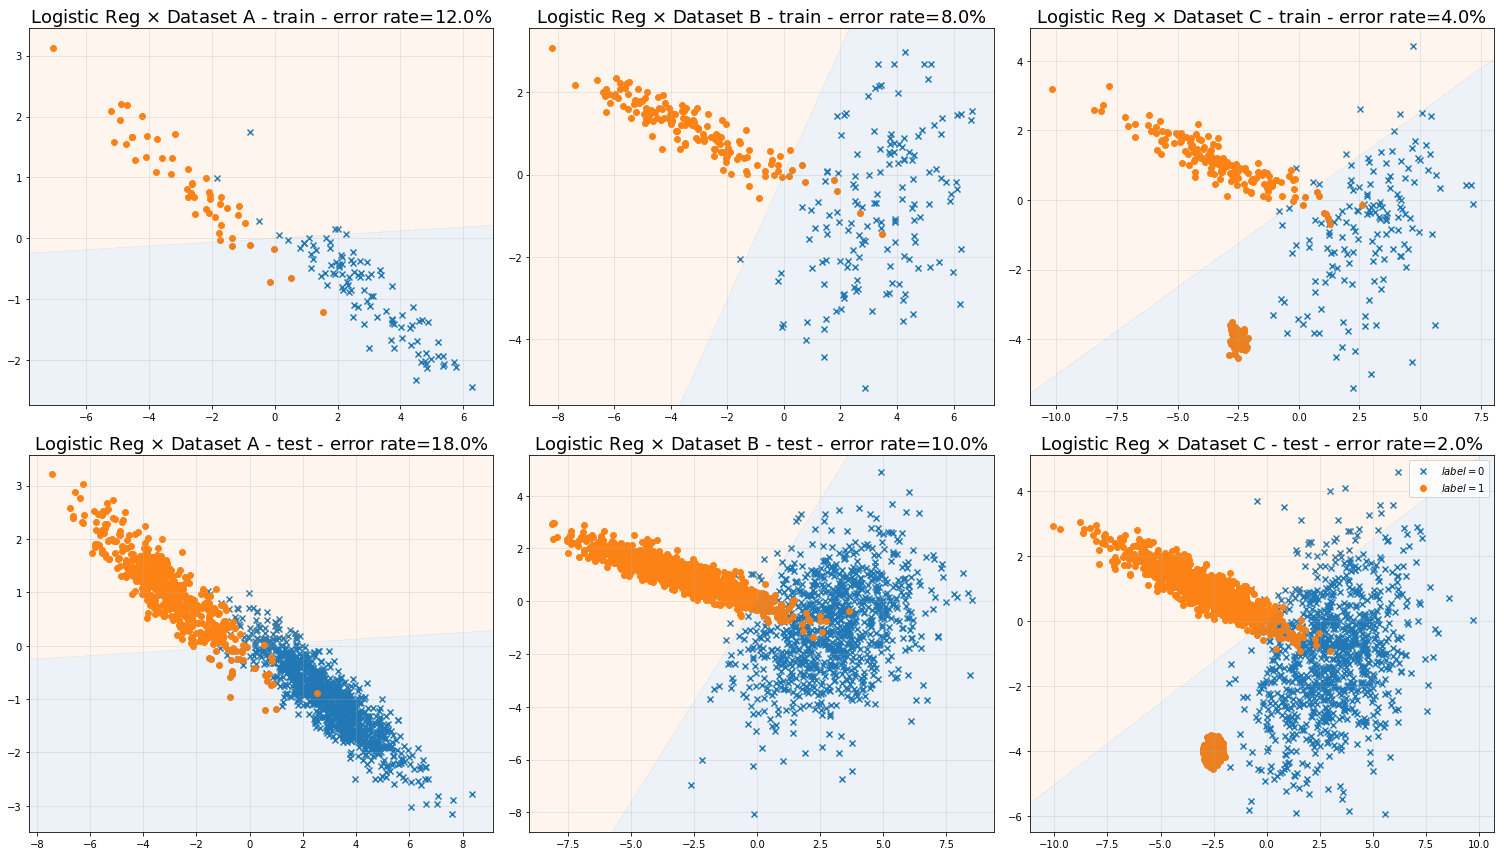

In [4]:
np.random.seed(1)
fig, ax = plt.subplots(2, 3, figsize=(21, 12))

for idx, key in enumerate(['A', 'B', 'C']):
    X_train = train[key][:,:2]
    y_train = train[key][:,-1]
    X_test = test[key][:,:2]
    y_test = test[key][:,-1]
    
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    missclassification = logreg.missclassification(X_train, y_train)
    title = r"Logistic Reg $\times$ Dataset " + key + " - train - error rate="+str(round(100*missclassification)) + "%"
    ax[0][idx] = logreg.plot_pred(X_train, y_train, title=title, figsize=(6, 6), ax=ax[0][idx])
    
    missclassification = logreg.missclassification(X_test, y_test)
    title = r"Logistic Reg $\times$ Dataset " + key + " - test - error rate="+str(round(100*missclassification)) + "%"
    ax[1][idx] = logreg.plot_pred(X_test, y_test, title=title, figsize=(6, 6), ax=ax[1][idx])
    plt.legend()

## 3. Linear regression

$$ Y\,|\,X\sim\mathcal{N}\left(w^{T}X,\sigma^{2}\right) $$

$$ \hat{w} = (X^{T}X)^{-1}X^{T}y $$

$$p(y=1|x) = \frac{1}{2}\Leftrightarrow x^{T}w

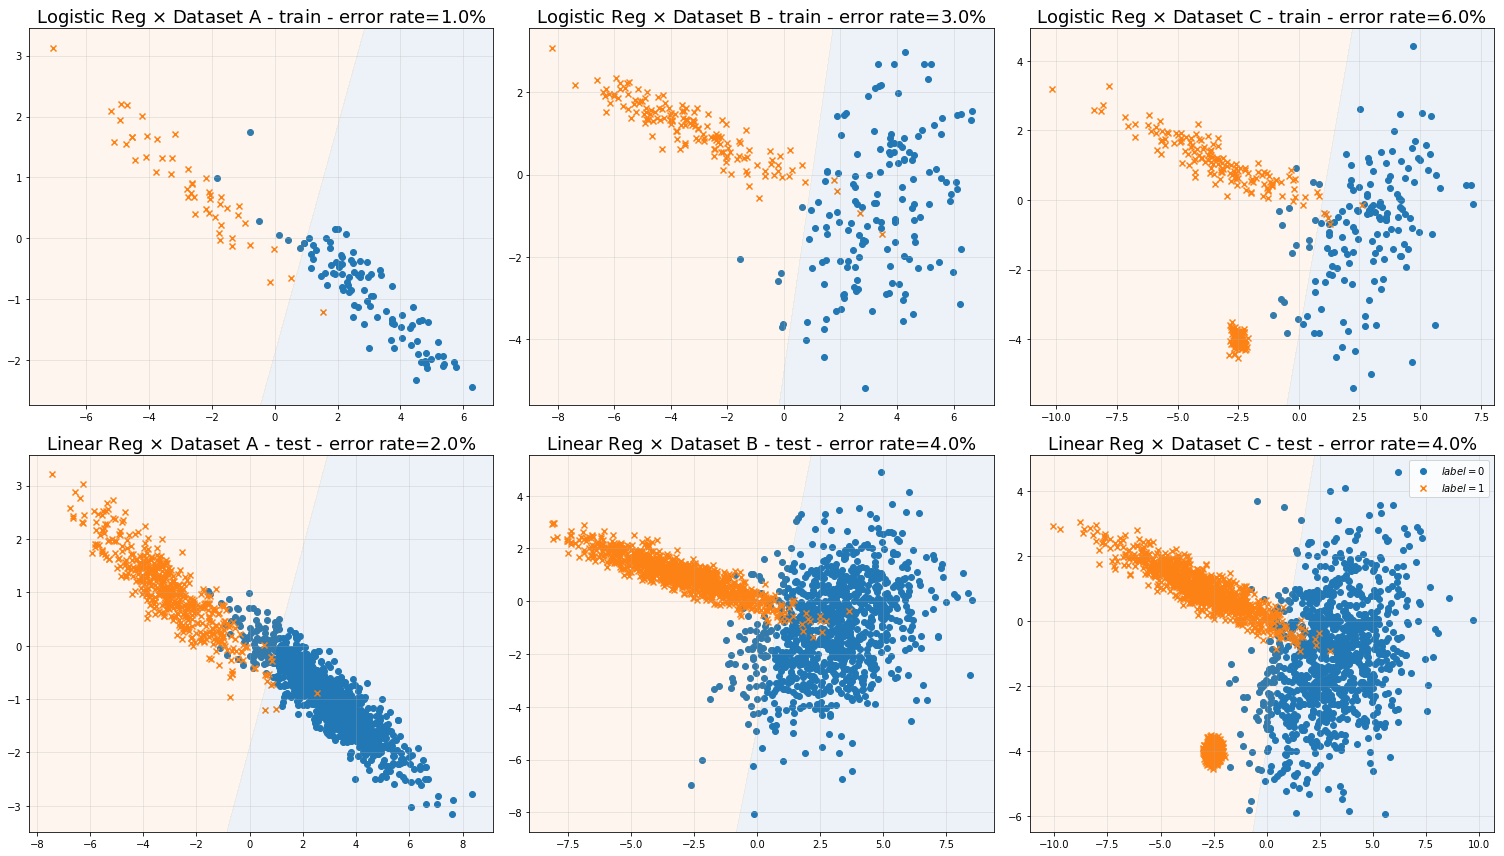

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(21, 12))

for idx, key in enumerate(['A', 'B', 'C']):
    X_train = train[key][:,:2]
    y_train = train[key][:,-1]
    X_test = test[key][:,:2]
    y_test = test[key][:,-1]
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    missclassification = linreg.missclassification(X_train, y_train)
    title = r"Logistic Reg $\times$ Dataset " + key + " - train - error rate="+str(round(100*missclassification)) + "%"
    ax[0][idx] = linreg.plot_pred(X_train, y_train, title=title, figsize=(6, 6), ax=ax[0][idx])
    
    missclassification = linreg.missclassification(X_test, y_test)
    title = r"Linear Reg $\times$ Dataset " + key + " - test - error rate="+str(round(100*missclassification)) + "%"
    ax[1][idx] = linreg.plot_pred(X_test, y_test, title=title, figsize=(6, 6), ax=ax[1][idx])
    plt.legend()

## 5. QDA model

$$ Y\sim\mathcal{B}(\pi), \enspace X\,|\,Y\!=\!i\sim\mathcal{N}\left(\mu_{i}, \Sigma_{i}\right)$$

$$\hat{\pi} = \frac{1}{N}\sum_{i=1}^{n}y_{i}$$

$$\forall j\in\{0,1\}, \enspace\hat{\mu}_{j}=\frac{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}x_{i}}{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}}$$

$$\forall j\in\{0,1\}, \enspace\hat{\Sigma}_{j}=\frac{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}(x_{i}-\hat{\mu}_{j})(x_{i}-\hat{\mu}_{j})^{T}}{\sum_{i=1}^{n}\mathbb{1}_{\{y_{i}=j\}}}$$

$$p(y=1|x)=\frac{1}{2}\Leftrightarrow\frac{1}{2}\log\left(\frac{\det \Sigma_{1}^{-1}}{\det \Sigma_{0}^{-1}}\right)+\frac{1}{2}\left[(x-\mu_{1})^{T}\Sigma_{1}^{-1}(x-\mu_{1})-(x-\mu_{0})^{T}\Sigma_{0}^{-1}(x-\mu_{0})\right] = \log\left(\frac{\pi}{1-\pi}\right)$$

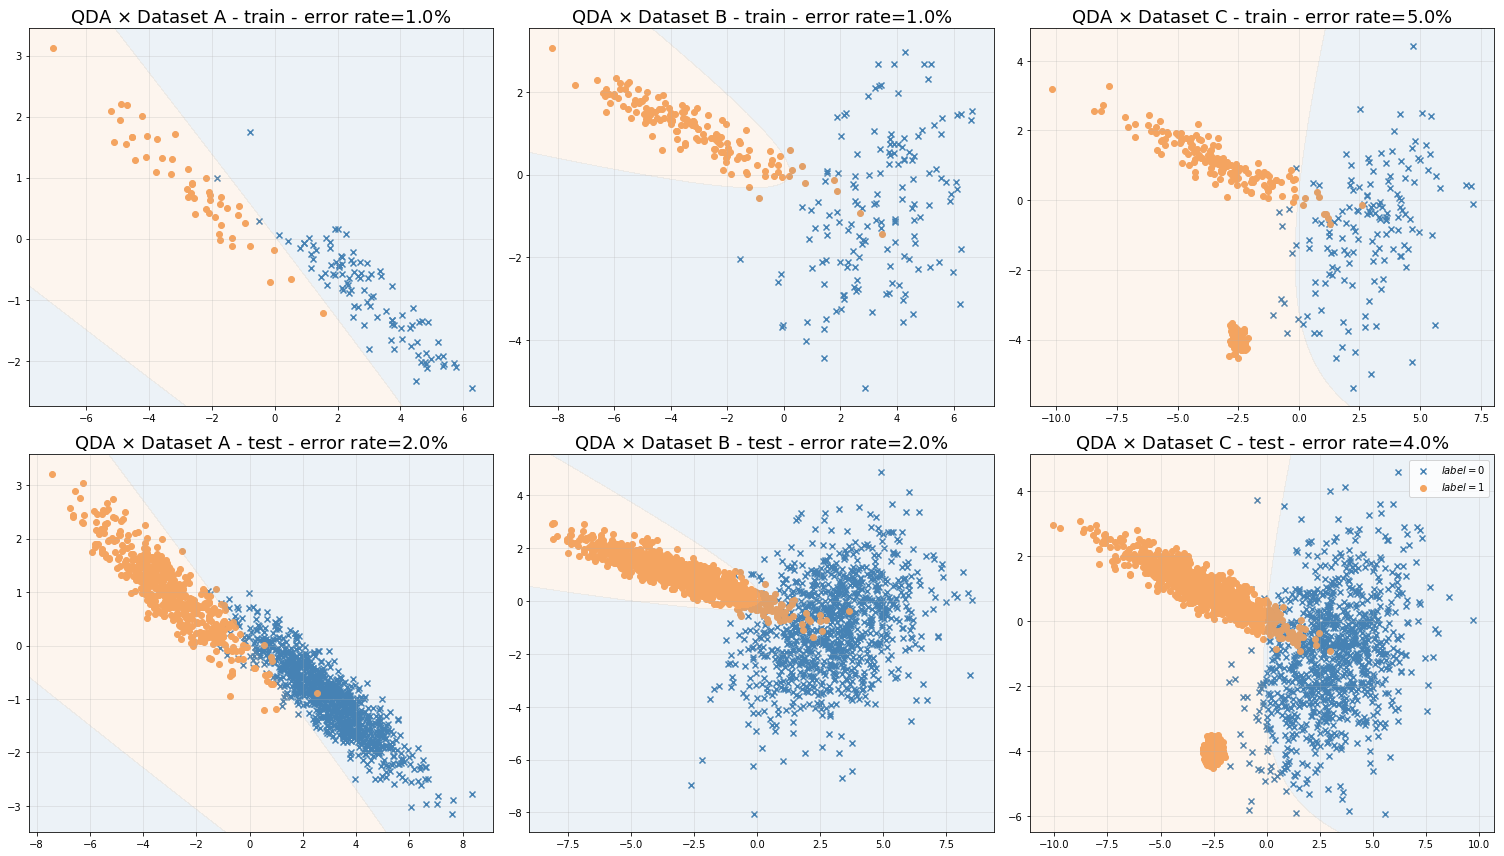

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(21, 12))

for idx, key in enumerate(['A', 'B', 'C']):
    X_train = train[key][:,:2]
    y_train = train[key][:,-1]
    X_test = test[key][:,:2]
    y_test = test[key][:,-1]
    
    qda = QDA()
    qda.fit(X_train, y_train)
    
    missclassification = qda.missclassification(X_train, y_train)
    title = r"QDA $\times$ Dataset " + key + " - train - error rate="+str(round(100*missclassification)) + "%"
    ax[0][idx] = qda.plot_pred(X_train, y_train, title=title, figsize=(6, 6), ax=ax[0][idx])
    
    missclassification = qda.missclassification(X_test, y_test)
    title = r"QDA $\times$ Dataset " + key + " - test - error rate="+str(round(100*missclassification)) + "%"
    ax[1][idx] = qda.plot_pred(X_test, y_test, title=title, figsize=(6, 6), ax=ax[1][idx])
    plt.legend()